In [154]:
import numpy as np
from scipy.linalg import pinv
from chromalab.observer import Observer, Cone
from chromalab.spectra import Illuminant
import matplotlib.pyplot as plt
from chromalab.spectra import Spectra

In [33]:
def plot_color_square(color):
    """
    Plots a square image filled with the interpolated color.

    Parameters:
    interpolated_color: numpy array of shape (3,), the RGB color to fill the square with.
    """
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the background color to the interpolated color
    ax.set_facecolor(color)

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the axis limits to make it a square
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Display the square
    plt.show()

In [118]:
# Define parameters
wavelengths = np.arange(390, 701, 1)
n = len(wavelengths)

# Load the trichromatic observer and illuminant
standard_trichromat = Observer.trichromat(wavelengths)
illuminant = Illuminant.get("D65").interpolate_values(wavelengths)


In [151]:
# Extract LMS responses (cone fundamentals)
lms_responses = np.vstack((
    standard_trichromat.sensors[2].data,  # L cone
    standard_trichromat.sensors[1].data,  # M cone
    standard_trichromat.sensors[0].data   # S cone
)) * illuminant.data

print(max(lms_responses[0]))

# Normalize LMS responses
lms_responses /= lms_responses.sum(axis=0, keepdims=True)

# Transformation matrix from LMS to RGB
lms_to_rgb_transformation = np.array([
    [ 5.47221206, -4.6419601 ,  0.16963708],
    [-1.1252419 ,  2.29317094, -0.1678952 ],
    [ 0.02980165, -0.19318073,  1.16364789]
])

0.836449883625


In [120]:

# Inverse transformation (RGB to LMS)
rgb_to_lms_transformation = np.linalg.inv(lms_to_rgb_transformation)
print(rgb_to_lms_transformation)

[[ 0.31399022  0.63951294  0.04649754]
 [ 0.15537241  0.75789446  0.08670142]
 [ 0.01775239  0.1094421   0.87256923]]


In [ ]:
# Recover SPD from RGB value
def recover_illuminance(rgb):
    # Convert RGB to LMS
    lms = rgb_to_lms_transformation @ rgb
    print(lms)
    print(lms_to_rgb_transformation @ lms)

    # Compute pseudoinverse of LMS responses
    basis_vectors = lms_responses
    print(basis_vectors.shape)
    basis_pinv = pinv(basis_vectors)
    print(basis_pinv.shape)

    # Solve for SPD
    spd = basis_pinv @ lms
    
    return spd

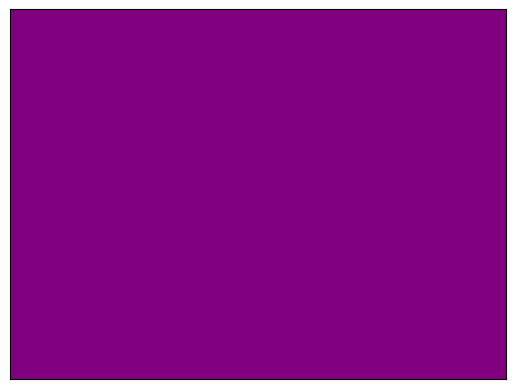

[ 0.18024388  0.12103691  0.44516081]
[  5.00000000e-01  -2.77555756e-17   5.00000000e-01]
(3, 311)
(311, 3)
(311,)


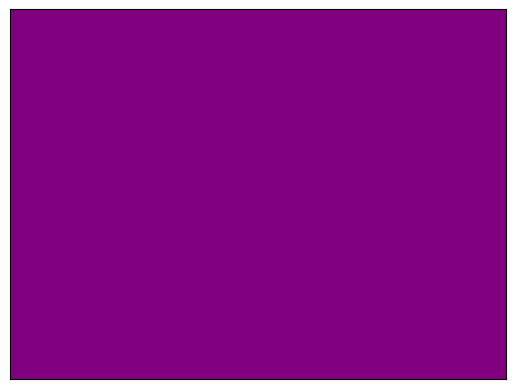

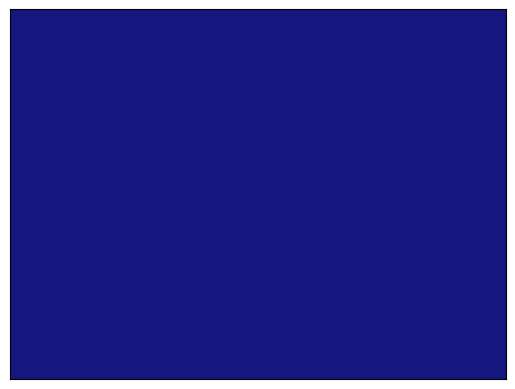

In [184]:
def bound(rgb):
    return np.clip(rgb, 0, 1)

# Gamma correction for sRGB space.
def gamma_correct(rgb):
    rgb_corrected = np.where(
        rgb <= 0.0031308,
        12.92 * rgb,
        1.055 * np.power(rgb, 1 / 2.4) - 0.055
    )
    return rgb_corrected

# Example RGB input (normalized to [0, 1])
rgb_input = np.array([0.5, 0.0, 0.5])
plot_color_square(rgb_input)
spd_recovered = recover_illuminance(rgb_input)

# lms = rgb_to_lms_transformation @ rgb_input
# tri_col = bound(lms_to_rgb_transformation @ lms)
# plot_color_square(tri_col)


# print("Recovered SPD:", spd_recovered)
print(spd_recovered.shape)


# temp = gamma_correct(bound(lms_to_rgb_transformation @ lms_responses @ spd_recovered))
# print("lms_to_rgb_transformation @ temp: ", temp)
# plot_color_square(temp)

plot_color_square(bound(lms_to_rgb_transformation @ lms_responses @ spd_recovered))


ms_to_rgb_transformation = np.array([
    [ 0, 1.05118294,  -0.05116099],
    [ 0,  1, 0],
    [ 0, 0,  1]
    ])

plot_color_square(bound(lms_to_rgb_transformation @ ms_to_rgb_transformation @ lms_responses @ spd_recovered))


# reflectance = Spectra(wavelengths=wavelengths, data=spd_recovered)
# print(reflectance.to_rgb(illuminant))
# plot_color_square(reflectance.to_rgb(illuminant))


# rgb = bound(lms_to_rgb_transformation @ ms_to_rgb_transformation @ lms)
# plot_color_square(rgb)



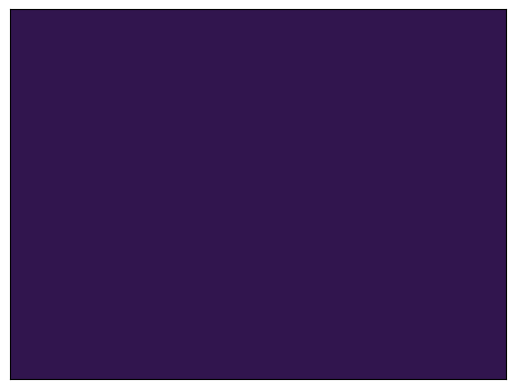

In [185]:
anomalous_l_cone = Cone.cone(525, template="stockman", od=0.35, wavelengths=wavelengths)
anomalous_m_cone = Cone.cone(525, template="stockman", od=0.15, wavelengths=wavelengths)
anomalous_s_cone = Cone.cone(419, template="stockman", od=0.5, wavelengths=wavelengths)

anomalous_lms_responses = np.vstack((anomalous_l_cone.data, anomalous_m_cone.data, anomalous_s_cone.data))


plot_color_square(bound(lms_to_rgb_transformation  @ anomalous_lms_responses @ spd_recovered))


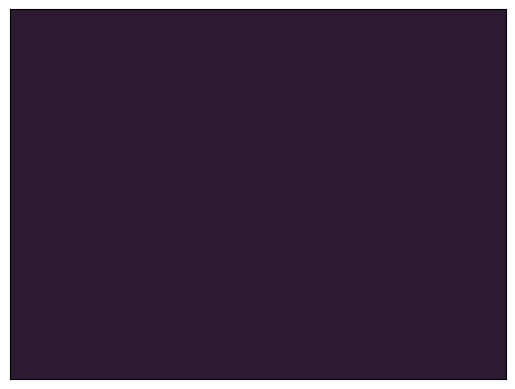

In [186]:
anomalous_l_cone = Cone.cone(528, template="stockman", od=0.35, wavelengths=wavelengths)
anomalous_m_cone = Cone.cone(525, template="stockman", od=0.15, wavelengths=wavelengths)
anomalous_s_cone = Cone.cone(319, template="stockman", od=0.5, wavelengths=wavelengths)

anomalous_lms_responses = np.vstack((anomalous_l_cone.data, anomalous_m_cone.data, anomalous_s_cone.data))


plot_color_square(bound(lms_to_rgb_transformation @ anomalous_lms_responses @ spd_recovered))

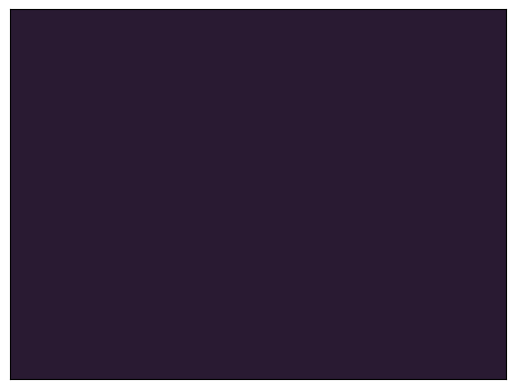

In [ ]:
anomalous_l_cone = Cone.cone(531, template="stockman", od=0.35, wavelengths=wavelengths)
anomalous_m_cone = Cone.cone(525, template="stockman", od=0.15, wavelengths=wavelengths)
anomalous_s_cone = Cone.cone(319, template="stockman", od=0.5, wavelengths=wavelengths)

anomalous_lms_responses = np.vstack((anomalous_l_cone.data, anomalous_m_cone.data, anomalous_s_cone.data))


plot_color_square(bound(lms_to_rgb_transformation @ anomalous_lms_responses @ spd_recovered))

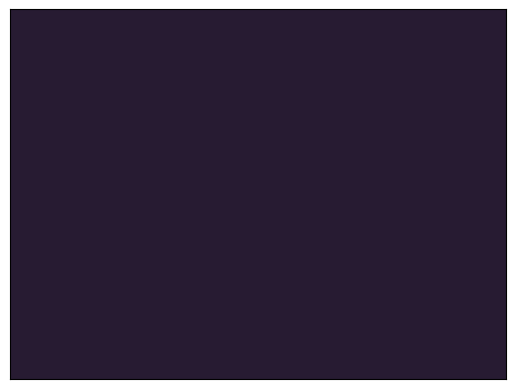

In [188]:
anomalous_l_cone = Cone.cone(537, template="stockman", od=0.35, wavelengths=wavelengths)
anomalous_m_cone = Cone.cone(525, template="stockman", od=0.15, wavelengths=wavelengths)
anomalous_s_cone = Cone.cone(319, template="stockman", od=0.5, wavelengths=wavelengths)

anomalous_lms_responses = np.vstack((anomalous_l_cone.data, anomalous_m_cone.data, anomalous_s_cone.data))


plot_color_square(bound(lms_to_rgb_transformation @ anomalous_lms_responses @ spd_recovered))

In [141]:
protanope = Observer.protanope(wavelengths)

# Extract LMS responses (cone fundamentals)
protanope_lms_responses = np.vstack((
    np.zeros(protanope.sensors[0].data.shape),
    protanope.sensors[1].data,  # M cone
    protanope.sensors[0].data   # S cone
)) * illuminant.data

# Normalize LMS responses
protanope_lms_responses /= protanope_lms_responses.sum(axis=0, keepdims=True)

In [144]:
# Calculate RGB for protanope observer
def protanope_rgb_from_spd(spd):
    # Convert SPD to LMS for protanope
    protanope_lms = protanope_lms_responses @ spd
    print("protanope_lms: ", protanope_lms)

    # Expand to include L channel as 0 (missing in protanope)
    full_lms = lms_responses @ spd # np.concatenate(([0], protanope_lms))

    # Convert LMS to RGB
    ms_to_rgb_transformation = np.array([
    [ 0, 1.05118294,  -0.05116099],
    [ 0,  1, 0],
    [ 0, 0,  1]
    ])
    rgb = lms_to_rgb_transformation @ ms_to_rgb_transformation @ full_lms
    return np.clip(protanope_lms, 0, 1)

In [76]:
# Calculate RGB for protanope observer
def protanope_rgb_from_spd_2(spd):
    # Load protanope observer
    protanope = Observer.protanope(wavelengths)

    # Extract LMS responses for protanope
    protanope_lms_responses = np.vstack((
        np.zeros(protanope.sensors[0].data.shape),
        protanope.sensors[1].data,  # M cone
        protanope.sensors[0].data   # S cone
    )) * illuminant.data

    # Normalize LMS responses
    protanope_lms_responses /= protanope_lms_responses.sum(axis=0, keepdims=True)

    

    # Convert SPD to LMS for protanope
    protanope_lms = protanope_lms_responses @ spd
    print(protanope_lms)
    print(protanope_lms.shape)

    # Reconstruct RGB directly using spectral information
    rgb = np.sum(spd[:, None] * lms_responses.T, axis=0)
    return np.clip(rgb, 0, 1)


protanope_lms:  [ 0.          1.35285881  0.15399068]


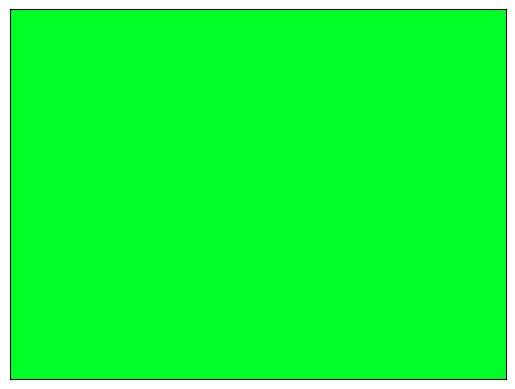

Protanope RGB: [ 0.          1.          0.15399068]


In [145]:
# Calculate protanope RGB
protanope_rgb = protanope_rgb_from_spd(spd_recovered)

plot_color_square(protanope_rgb)

print("Protanope RGB:", protanope_rgb)


In [79]:
# Calculate RGB for standard trichromat observer
def trichromat_rgb_from_spd(spd):
    # Convert SPD to LMS for standard trichromat
    trichromat_lms = lms_responses @ spd

    # Reconstruct RGB directly using spectral information
    rgb = np.sum(spd[:, None] * lms_responses.T, axis=0)
    return np.clip(rgb, 0, 1)

Trichromat RGB: [ 0.31416741  0.15556714  0.02238524]


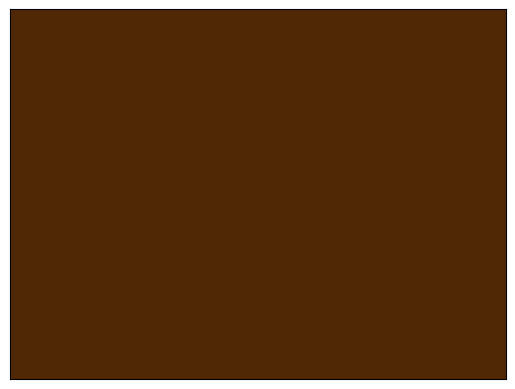

In [83]:
trichromat_rgb = trichromat_rgb_from_spd(spd_recovered)
print("Trichromat RGB:", trichromat_rgb)
plot_color_square(trichromat_rgb)
